In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans




In [ ]:
# Read the data from the local file
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
print(df.shape)
df.head(100)

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2458,Female,78.0,0,0,Yes,Private,Rural,235.63,32.3,never smoked,1
96,35512,Female,70.0,0,0,Yes,Self-employed,Rural,76.34,24.4,formerly smoked,1
97,56841,Male,58.0,0,1,Yes,Private,Rural,240.59,31.4,smokes,1
98,8154,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.7,formerly smoked,1


In [ ]:
# 3: Showing descriptive information of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [ ]:
df.fillna(df['bmi'].mean(),inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.head(100)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2458,Female,78.0,0,0,Yes,Private,Rural,235.63,32.300000,never smoked,1
96,35512,Female,70.0,0,0,Yes,Self-employed,Rural,76.34,24.400000,formerly smoked,1
97,56841,Male,58.0,0,1,Yes,Private,Rural,240.59,31.400000,smokes,1
98,8154,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.700000,formerly smoked,1


In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

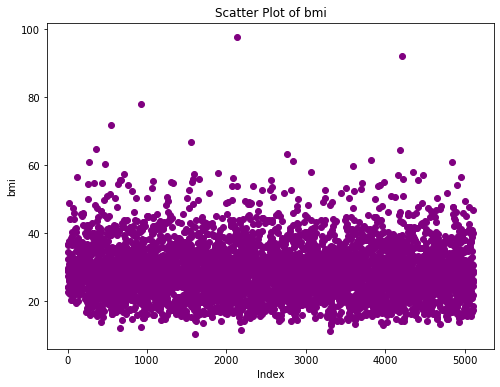

In [ ]:
# Create a scatter plot to visualize the distribution of BMI
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df['bmi'])), df['bmi'],color = 'purple')
plt.title('Scatter Plot of bmi')
plt.xlabel('Index')
plt.ylabel('bmi')
plt.show()

In [ ]:
# Compute the mean of the 'BMI' column
mean_bmi = df['bmi'].mean()

# Define the range for BMI outliers
lower_bound = 15
upper_bound = 50

# Identify outliers within the defined range
outliers = (df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)

print('Number of Outliers = ',outliers.sum())

# Replace outliers with the mean
df.loc[outliers, 'bmi'] = mean_bmi

Number of Outliers =  121


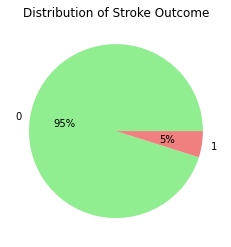

In [ ]:
# Calculate the distribution of the 'stroke' column
stroke_distribution = df['stroke'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 4))
plt.pie(stroke_distribution, labels=stroke_distribution.index, autopct='%1.f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Stroke Outcome')
plt.show()

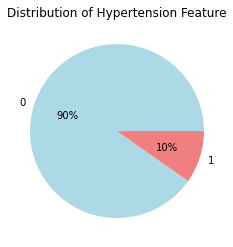

In [ ]:
# Calculate the distribution of the 'hypertension' column
hypertension_distribution = df['hypertension'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 4))
plt.pie(hypertension_distribution, labels=hypertension_distribution.index, autopct='%1.f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Hypertension Feature')
plt.show()

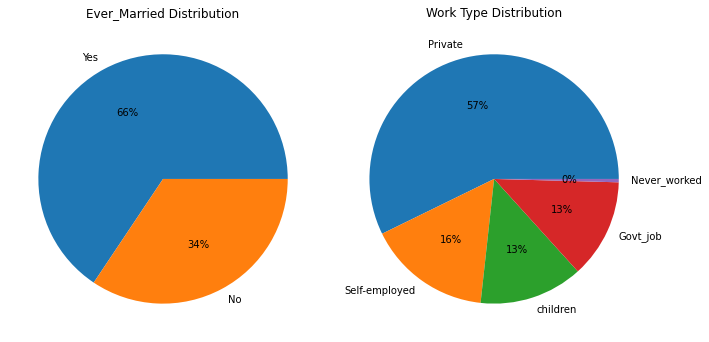

In [ ]:
# Calculate the distribution of the 'ever_married' column
married_distribution = df['ever_married'].value_counts()

# Calculate the distribution of the 'work_type' column
work_type_distribution = df['work_type'].value_counts()

# Create pie chart for 'ever_married'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(married_distribution, labels=married_distribution.index, autopct='%1.f%%',)
plt.title('Ever_Married Distribution')

# Create pie chart for 'work_type'
plt.subplot(1, 2, 2)
plt.pie(work_type_distribution, labels=work_type_distribution.index, autopct='%1.f%%',)
plt.title('Work Type Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# Convert categorical values in gender column to numerical values
#The 'gender' column contains categorical values such as 'Male', 'Female', and 'Other'.
gender_to_num = {'Male': 0, 'Female': 1, 'Other': 2}
df['gender'] = df['gender'].replace(gender_to_num)

# Convert categorical values in ever_married column to numerical values
#The 'ever_married' column includes categorical values 'Yes' and 'No'.
married_to_num = {'No': 0, 'Yes': 1}
df['ever_married'] = df['ever_married'].replace(married_to_num)


# Convert categorical values in residence_type column to numerical values
#The 'Residence_type' column contains categorical values 'Rural' and 'Urban'.
residence_to_num = {'Rural': 0, 'Urban': 1}
df['Residence_type'] = df['Residence_type'].replace(residence_to_num)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,0,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [ ]:

# Extract the 'work_type' column
work_type_data = df[['work_type']]

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the 'work_type' data
work_type_encoded = encoder.fit_transform(work_type_data)

# Convert the encoded data into a DataFrame
work_type_encoded_df = pd.DataFrame(work_type_encoded.toarray(), columns=encoder.get_feature_names(['work']))

# Concatenate the encoded DataFrame with the original DataFrame, dropping the original 'work_type' column
df_encoded = pd.concat([df.drop(columns=['work_type']), work_type_encoded_df], axis=1)

# Display the updated DataFrame
df_encoded.head()



,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
0,9046,0,67.0,0,1,1,1,228.69,36.600000,formerly smoked,1,0.0,0.0,1.0,0.0,0.0
1,51676,1,61.0,0,0,1,0,202.21,28.893237,never smoked,1,0.0,0.0,0.0,1.0,0.0
2,31112,0,80.0,0,1,1,0,105.92,32.500000,never smoked,1,0.0,0.0,1.0,0.0,0.0
3,60182,1,49.0,0,0,1,1,171.23,34.400000,smokes,1,0.0,0.0,1.0,0.0,0.0
4,1665,1,79.0,1,0,1,0,174.12,24.000000,never smoked,1,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_encoded.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke', 'work_Govt_job', 'work_Never_worked', 'work_Private',
       'work_Self-employed', 'work_children'],
      dtype='object')

In [ ]:

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'smoking_status' column
df_encoded['smoking_status_encoded'] = label_encoder.fit_transform(df_encoded['smoking_status'])

# Drop the 'smoking_status' column
df_encoded.drop(columns=['smoking_status'], inplace=True)

# Display the updated DataFrame
df_encoded.head()


,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,smoking_status_encoded
0,9046,0,67.0,0,1,1,1,228.69,36.600000,1,0.0,0.0,1.0,0.0,0.0,1
1,51676,1,61.0,0,0,1,0,202.21,28.893237,1,0.0,0.0,0.0,1.0,0.0,2
2,31112,0,80.0,0,1,1,0,105.92,32.500000,1,0.0,0.0,1.0,0.0,0.0,2
3,60182,1,49.0,0,0,1,1,171.23,34.400000,1,0.0,0.0,1.0,0.0,0.0,3
4,1665,1,79.0,1,0,1,0,174.12,24.000000,1,0.0,0.0,0.0,1.0,0.0,2


In [ ]:
df_encoded.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'work_Govt_job',
       'work_Never_worked', 'work_Private', 'work_Self-employed',
       'work_children', 'smoking_status_encoded'],
      dtype='object')

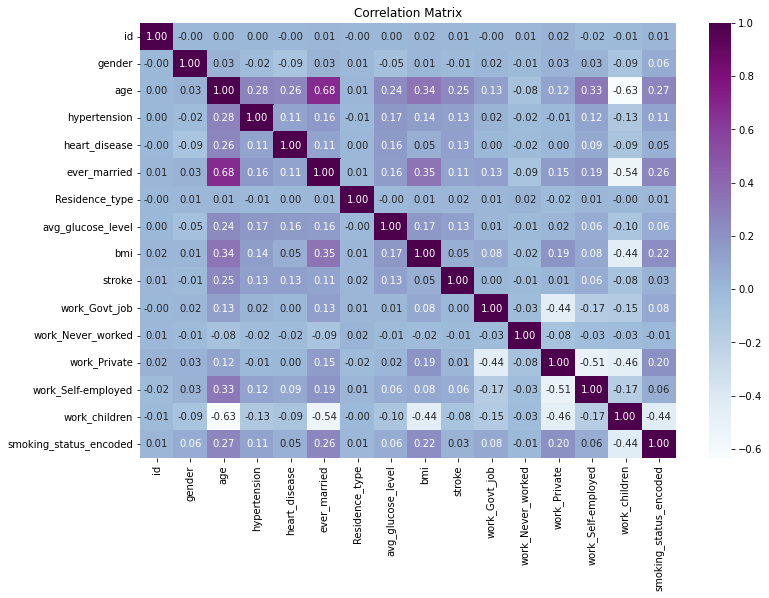

In [ ]:
# Compute the correlation matrix
#The correlation coefficient measures the strength and direction of the
#linear relationship between two variables. It ranges from -1 to 1:
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

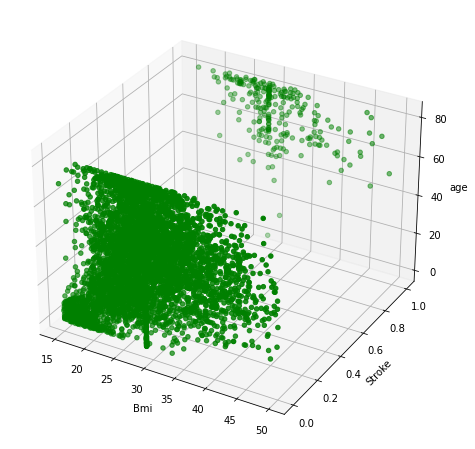

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract data (bmi,stroke,age) from dataframe for plotting
bmi = df_encoded['bmi']
stroke = df_encoded['stroke']
age = df_encoded['age']

# Plot the data points
ax.scatter(bmi, stroke, age, c='g', marker='o')

# Set labels and title
ax.set_xlabel('Bmi')
ax.set_ylabel('Stroke')
ax.set_zlabel('age')

# Show the plot
plt.show()


In [ ]:
# Separate features (features) and target variable (target)
features = df_encoded.drop(columns=['stroke'])  # Features
target = df_encoded['stroke']  # Target variable

# Apply PCA to reduce features to 2 dimensions
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Create a new DataFrame with the reduced features
df_features_pca = pd.DataFrame(data=features_pca, columns=['Pca1', 'Pca2'])

# Concatenate the target variable with the reduced features DataFrame
df_features_pca['stroke'] = target.values

# Display the new DataFrame with two features
df_features_pca.head()


,Pca1,Pca2,stroke
0,27471.828937,125.004457,1
1,-15158.170939,97.574904,1
2,5405.829195,5.555966,1
3,-23664.170850,65.269876,1
4,34852.829082,72.604677,1


In [ ]:
# Separate features (X) and target variable (y)
X = df_features_pca.drop(columns=['stroke'])  # Features

# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df_features_pca['cluster'] = kmeans.labels_

# Display the DataFrame with cluster labels
df_features_pca.head()


,Pca1,Pca2,stroke,cluster
0,27471.828937,125.004457,1,0
1,-15158.170939,97.574904,1,1
2,5405.829195,5.555966,1,2
3,-23664.170850,65.269876,1,1
4,34852.829082,72.604677,1,0


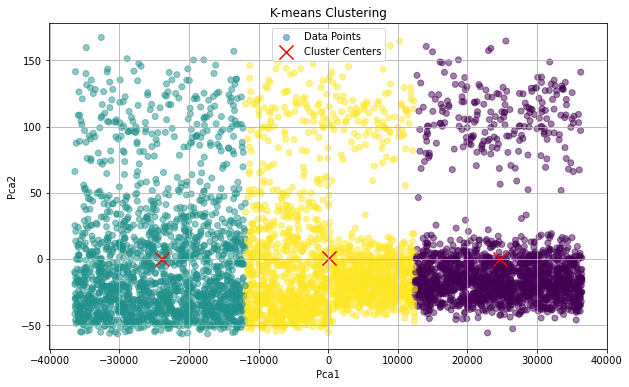

In [ ]:
# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(df_features_pca['Pca1'], df_features_pca['Pca2'], c=df_features_pca['cluster'], cmap='viridis', alpha=0.5, label='Data Points')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')

# Set labels and title
plt.xlabel('Pca1')
plt.ylabel('Pca2')
plt.title('K-means Clustering')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
